In [2]:
import pandas as pd
import numpy as np
import scipy, pylab
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, mean_absolute_percentage_error, r2_score
import optuna
import pickle

ModuleNotFoundError: No module named 'optuna'

In [4]:
pid_1 = pd.read_csv('Data/PID_garnek_1st_try.csv')
pid_2 = pd.read_csv('Data/PID_garnek_2nd_try.csv')
pid_3 = pd.read_csv('Data/PID_garnek_3rd_try.csv')
pid_4 = pd.read_csv('Data/PID_garnek_4th_try_cut.csv')
pid_5 = pd.read_csv('Data/PID_garnek_5th_try.csv')
pid_6 = pd.read_csv('Data/PID_garnek_6th_try.csv')
pid_1.drop(index = 0, inplace= True)
pid_2.drop(index = 0, inplace= True)
pid_3.drop(index = 0, inplace= True)
pid_4.drop(index = 0, inplace= True)
pid_5.drop(index = 0, inplace= True)
pid_6.drop(index = 0, inplace= True)

In [5]:
pid =  pd.concat([pid_1, pid_2, pid_3, pid_4, pid_5, pid_6])

In [6]:
pid.describe()

,temperatura,regulacja,nastaw_t
count,10130.000000,10130.000000,10130.000000
mean,51.032359,14.189437,49.558934
std,6.084671,20.652137,4.961052
min,21.989999,0.000000,43.000000
25%,46.535637,0.000000,45.000000
50%,50.462939,5.000000,47.000000
75%,55.605835,22.000000,55.000000
max,67.668263,100.000000,59.000000


In [7]:
pid['error'] = pid['nastaw_t'] - pid['temperatura']

In [8]:
pid.head(5)

,temperatura,regulacja,nastaw_t,error
1,40.644684,23.0,47.0,6.355316
2,40.457670,29.0,47.0,6.542330
3,40.551177,28.0,47.0,6.448823
4,41.205727,22.0,47.0,5.794273
5,41.205727,30.0,47.0,5.794273


In [9]:
pid.corr()

,temperatura,regulacja,nastaw_t,error
temperatura,1.000000,-0.265702,0.671759,-0.599413
regulacja,-0.265702,1.000000,0.298364,0.674528
nastaw_t,0.671759,0.298364,1.000000,0.190281
error,-0.599413,0.674528,0.190281,1.000000


In [10]:
a = mean_absolute_error(pid['nastaw_t'], pid['temperatura'])
b = mean_squared_error(pid['nastaw_t'], pid['temperatura'],  squared=True)
c = mean_squared_error(pid['nastaw_t'], pid['temperatura'],  squared=False)
d = median_absolute_error(pid['nastaw_t'], pid['temperatura'])
e = mean_absolute_percentage_error(pid['nastaw_t'], pid['temperatura'])
f = r2_score(pid['nastaw_t'], pid['temperatura'])

print("mean_absolute_error = ", a, 
      "mean_squared_error = ", b, 
      "root_mean_squared_error = ", c, 
      "median_absolute_error = ", d,
      "mean_absolute_percentage_error = ", e, 
      "r2_score = ", f)

mean_absolute_error =  3.033995778773043 mean_squared_error =  23.24823907786616 root_mean_squared_error =  4.8216427779197994 median_absolute_error =  1.4564867202768035 mean_absolute_percentage_error =  0.06189073820027419 r2_score =  0.055318546779412614


In [11]:
## Trening procedure
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import xgboost as xgb
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'XGB']
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha = 1.0000427711635971e-05, l1_ratio = 0.9992450829121196, max_iter =5314)
    model3 = RandomForestRegressor(n_estimators= 43, bootstrap = True)
    model4 = ExtraTreesRegressor(n_estimators=242, bootstrap = True)
    model5 = SVR(kernel = 'rbf', C = 13551.510315708745, gamma = 1.253432506029399) 
    model6 = GradientBoostingRegressor(n_estimators = 4706, min_samples_split = 8) 
    model7 = xgb.XGBRegressor(objective="reg:squarederror", n_estimators = 346, max_iter = 3948, eta = 0.0597309534580587)

    # Dataframe for results
    results = pd.DataFrame(columns=['mean_absolute_error', 'mean_squared_error', 
                                    'root_mean_squared_error', 'median_absolute_error', 
                                    'mean_absolute_percentage_error', 'r2_score'], index = model_name_list)
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6, model7]):
        model.fit(X_train, y_train.ravel())
        predictions = model.predict(X_test)
        # Charts
        plt.figure(figsize=(14,6))
        plt.scatter(x = X_test, y = y_test, label='PID')
        plt.scatter(x = X_test, y = predictions, label = "Model")
        plt.xlabel = "error"
        plt.ylabel = "output"
        plt.legend(loc='upper left')
        plt.gca().update(dict(title=model_name_list[i], xlabel='error', ylabel='output'))
        plt.show()
        # Metrics       
        mae = mean_absolute_error(y_test, predictions)
        mse = mean_squared_error(y_test, predictions,squared=True)
        rmse = mean_squared_error(y_test, predictions, squared=False)
        meae = median_absolute_error(y_test, predictions)
        mape = mean_absolute_percentage_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, mse, rmse, meae, mape, r2]
        
    return model1, model2, model3, model4, model5, model6, model7, results

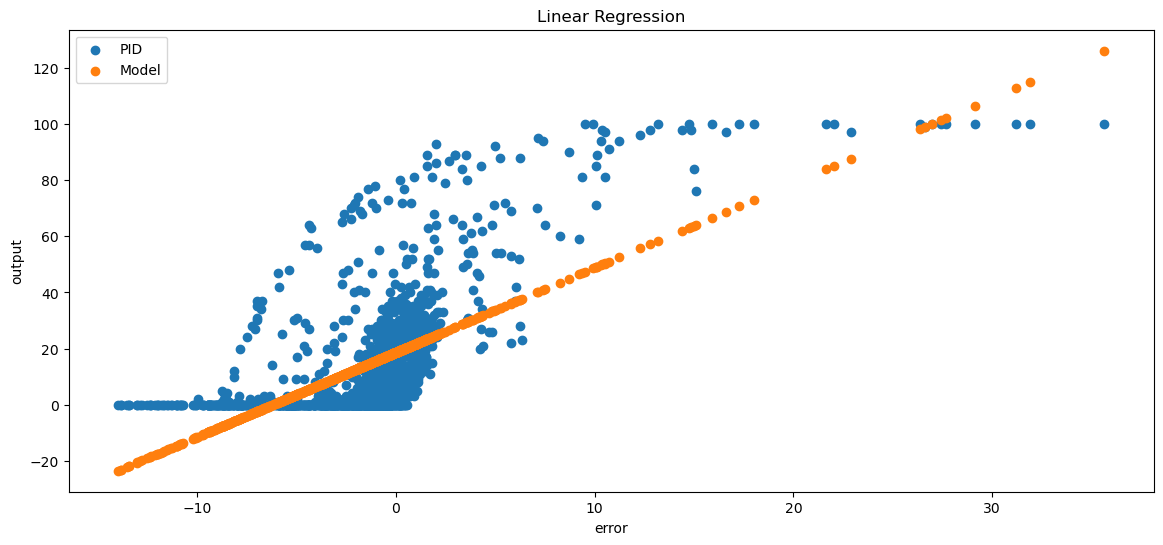

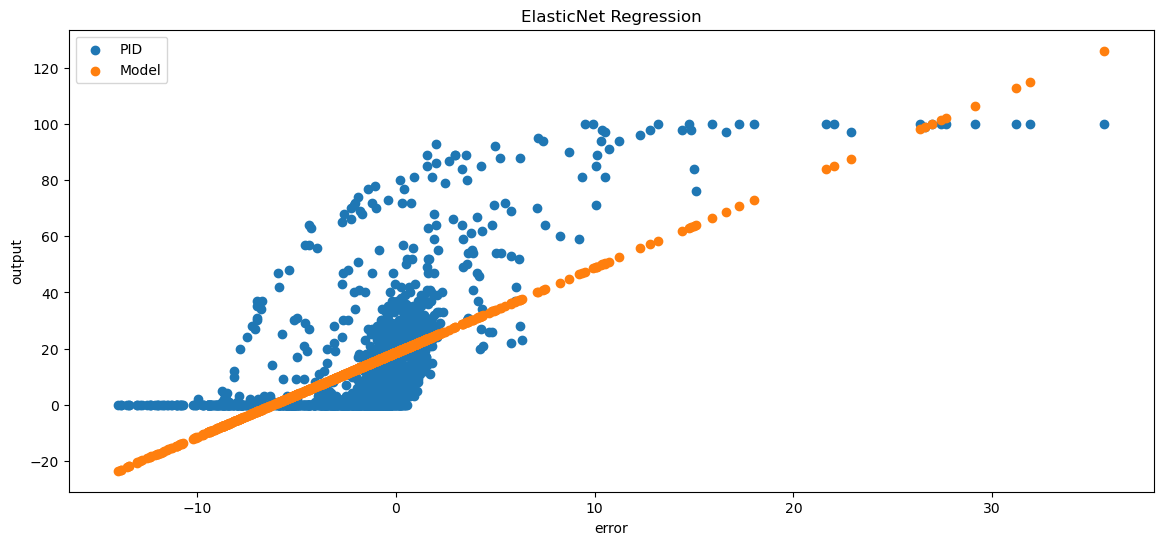

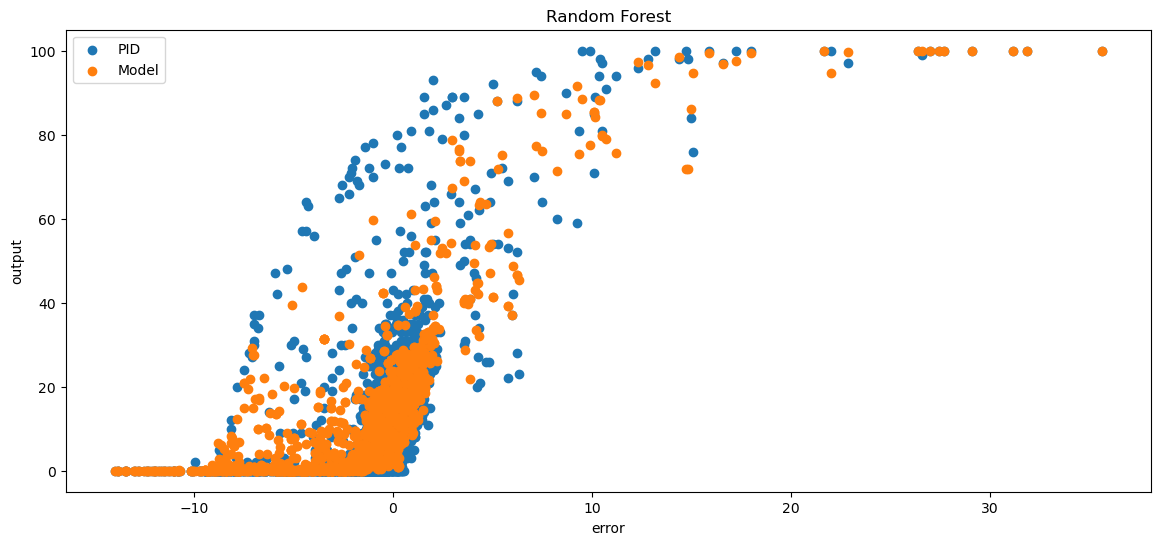

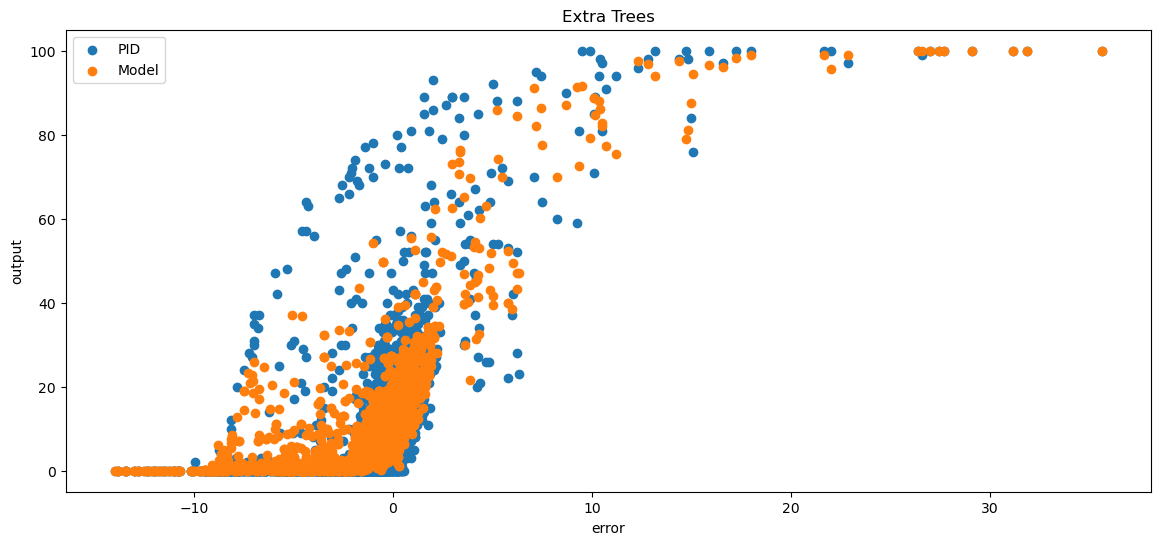

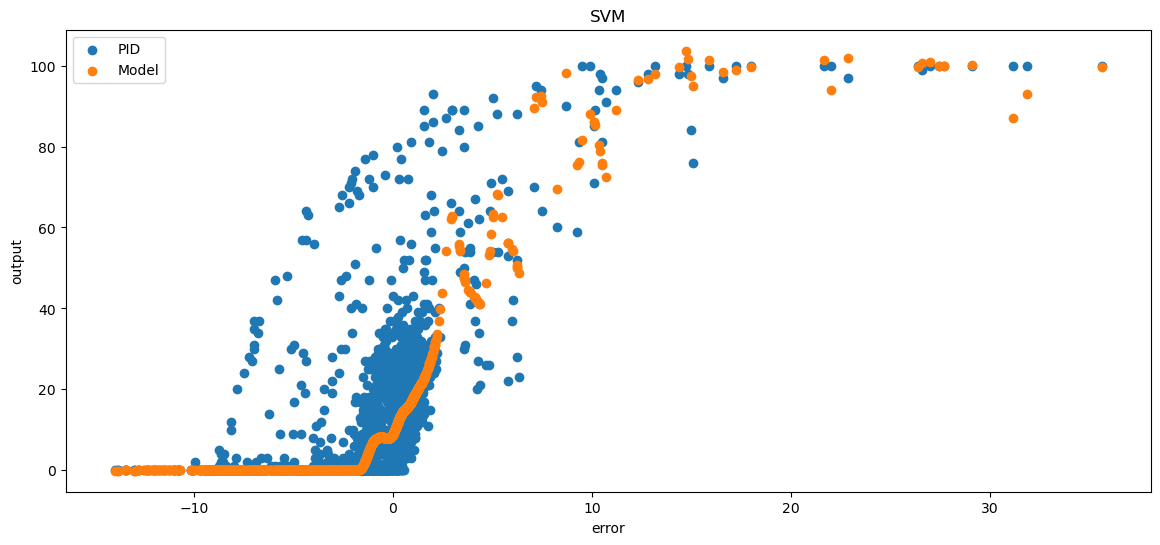

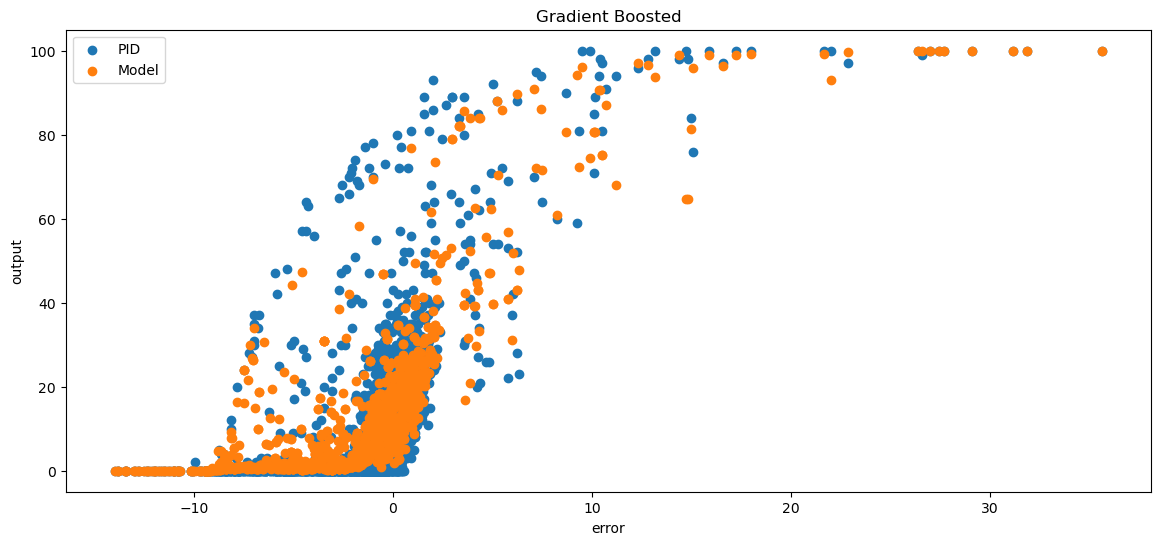

[08:29:07] WARNING: ../src/learner.cc:767: 
Parameters: { "max_iter" } are not used.



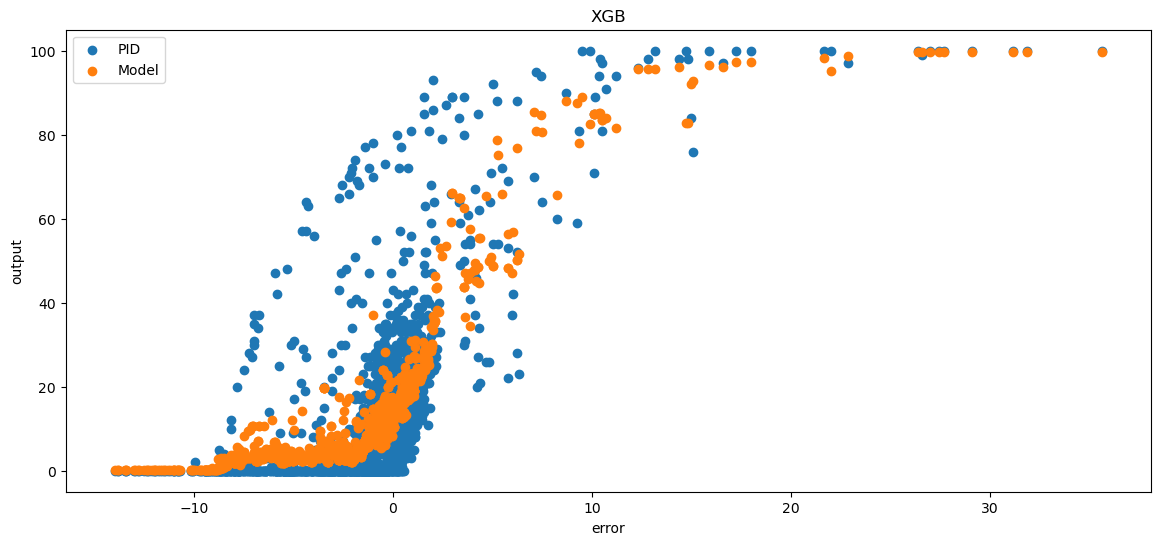

In [12]:
X = np.array(pid['error']).reshape(-1, 1)
y = np.array(pid['regulacja']).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
model1, model2, model3, model4, model5, model6, model7, results = evaluate(X_train, X_test, y_train, y_test)

In [11]:
results

,mean_absolute_error,mean_squared_error,root_mean_squared_error,median_absolute_error,mean_absolute_percentage_error,r2_score
Linear Regression,11.933511,261.777713,16.179546,9.721734,18375171128166676.0,0.448726
ElasticNet Regression,11.933511,261.777716,16.179546,9.721735,18375170049186584.0,0.448726
Random Forest,8.602915,197.299889,14.046348,5.519675,8255686006447039.0,0.584509
Extra Trees,8.585225,193.292673,13.902974,5.4861,8476418468437458.0,0.592948
SVM,7.987585,195.74033,13.990723,4.957841,3673453815443597.0,0.587793
Gradient Boosted,8.627355,197.506733,14.053709,5.356981,8745506073835226.0,0.584073
XGB,8.768611,177.281824,13.314722,6.074279,9752431235562140.0,0.626665


In [ ]:
# ElasticNet TUNING
def objective(trial):
    # Invoke suggest methods of a Trial object to generate hyperparameters.
    n_alpha = trial.suggest_float('alpha', 1e-5, 1, log=True)
    n_l1_ratio = trial.suggest_float('l1_ratio', 1e-5, 1, log=True)
    n_max_iter = trial.suggest_int('max_iter', 1, 1e4, log=True)
    # n_bootstrap = trial.suggest_categorical("bootstrap", [True, False])
    regressor_obj = ElasticNet(alpha=n_alpha, l1_ratio=n_l1_ratio, max_iter= n_max_iter)
    X = np.array(pid['error']).reshape(-1, 1)
    y = np.array(pid['regulacja']).reshape(-1, 1).ravel()
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)
    regressor_obj.fit(X_train, y_train)
    y_pred = regressor_obj.predict(X_val)
    error = mean_squared_error(y_val, y_pred)
    return error  # An objective value linked with the Trial object.

In [ ]:
study = optuna.create_study()  # Create a new study.
study.optimize(objective, n_trials=1500) 

In [ ]:
# RandomForest TUNING
def objective(trial):
    # Invoke suggest methods of a Trial object to generate hyperparameters.
    n_estimators = trial.suggest_int('n_estimators', 1, 1e4, log=True)
    # n_bootstrap = trial.suggest_categorical("bootstrap", [True, False])
    regressor_obj = RandomForestRegressor(n_estimators = n_estimators, bootstrap = True)
    X = np.array(pid['error']).reshape(-1, 1)
    y = np.array(pid['regulacja']).reshape(-1, 1).ravel()
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)
    regressor_obj.fit(X_train, y_train)
    y_pred = regressor_obj.predict(X_val)
    error = mean_squared_error(y_val, y_pred)
    return error  # An objective value linked with the Trial object.

In [ ]:
study = optuna.create_study()  # Create a new study.
study.optimize(objective, n_trials=50) 

In [ ]:
# ExtraTreesRegressor TUNING
def objective(trial):
    # Invoke suggest methods of a Trial object to generate hyperparameters.
    n_estimators = trial.suggest_int('n_estimators', 1, 1e4, log=True)
    regressor_obj = ExtraTreesRegressor(n_estimators = n_estimators, bootstrap = True)
    X = np.array(pid['error']).reshape(-1, 1)
    y = np.array(pid['regulacja']).reshape(-1, 1).ravel()
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)
    regressor_obj.fit(X_train, y_train)
    y_pred = regressor_obj.predict(X_val)
    error = mean_squared_error(y_val, y_pred)
    return error  # An objective value linked with the Trial object.

In [ ]:
study = optuna.create_study()  # Create a new study.
study.optimize(objective, n_trials=50) 

In [ ]:
# SVR TUNING
def objective(trial):
    # Invoke suggest methods of a Trial object to generate hyperparameters.
    svr_c = trial.suggest_float('C', 1, 1e5, log=True)
    gamma_c = trial.suggest_float('gamma', 1e-3, 1e3, log=True)
    regressor_obj = SVR(kernel = 'rbf', C=svr_c, gamma = gamma_c)
    X = np.array(pid['error']).reshape(-1, 1)
    y = np.array(pid['regulacja']).reshape(-1, 1).ravel()
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)
    regressor_obj.fit(X_train, y_train)
    y_pred = regressor_obj.predict(X_val)
    error = mean_squared_error(y_val, y_pred)
    return error  # An objective value linked with the Trial object.

In [ ]:
study = optuna.create_study()  # Create a new study.
study.optimize(objective, n_trials=50)  # Invoke optimization of the objective function.

In [ ]:
# GradientBoosting TUNING
def objective(trial):
    # Invoke suggest methods of a Trial object to generate hyperparameters.
    n_estimators_int = trial.suggest_int('n_estimators', 1, 100000, log=True)
    min_samples_split_int = trial.suggest_int('min_samples_split', 2, 100000, log=True)
    regressor_obj = GradientBoostingRegressor(n_estimators=n_estimators_int, min_samples_split = min_samples_split_int)
    X = np.array(pid['error']).reshape(-1, 1)
    y = np.array(pid['regulacja']).reshape(-1, 1).ravel()
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)
    regressor_obj.fit(X_train, y_train)
    y_pred = regressor_obj.predict(X_val)
    error = mean_absolute_error(y_val, y_pred)
    return error  # An objective value linked with the Trial object.

In [ ]:
study = optuna.create_study()  # Create a new study.
study.optimize(objective, n_trials=150) 

In [ ]:
# XGBRegressor TUNING
def objective(trial):
    # Invoke suggest methods of a Trial object to generate hyperparameters.
    n_n_estimators = trial.suggest_int('n_estimators', 200, 500, log=True)
    n_max_iter = trial.suggest_int('max_iter', 1, 1e4, log=True)
    n_eta = trial.suggest_float('eta', 1e-5, 1, log=True)
    # n_bootstrap = trial.suggest_categorical("bootstrap", [True, False])
    regressor_obj = xgb.XGBRegressor(objective="reg:squarederror", random_state=42, n_estimators=n_n_estimators, eta=n_eta)
    X = np.array(pid['error']).reshape(-1, 1)
    y = np.array(pid['regulacja']).reshape(-1, 1).ravel()
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)
    regressor_obj.fit(X_train, y_train)
    y_pred = regressor_obj.predict(X_val)
    error = mean_squared_error(y_val, y_pred)
    return error  # An objective value linked with the Trial object.


In [ ]:
study = optuna.create_study()  # Create a new study.
study.optimize(objective, n_trials=150) 

In [51]:
results_2 = pd.DataFrame(columns=['mean_absolute_error', 'mean_squared_error', 
                                    'root_mean_squared_error', 'median_absolute_error', 
                                    'mean_absolute_percentage_error', 'r2_score'], index = ["PID", "SVM"])



a = mean_absolute_error(pid_6['nastaw_t'], pid_6['temperatura'])
b = mean_squared_error(pid_6['nastaw_t'], pid_6['temperatura'],  squared=True)
c = mean_squared_error(pid_6['nastaw_t'], pid_6['temperatura'],  squared=False)
d = median_absolute_error(pid_6['nastaw_t'], pid_6['temperatura'])
e = mean_absolute_percentage_error(pid_6['nastaw_t'], pid_6['temperatura'])
f = r2_score(pid_6['nastaw_t'], pid_6['temperatura'])

print("mean_absolute_error = ", a, 
      "mean_squared_error = ", b, 
      "root_mean_squared_error = ", c, 
      "median_absolute_error = ", d,
      "mean_absolute_percentage_error = ", e, 
      "r2_score = ", f)

results_2.loc["PID", :] = [a, b, c, d, e, f]

mean_absolute_error =  2.7464115621351395 mean_squared_error =  25.967631377601045 root_mean_squared_error =  5.0958445205481935 median_absolute_error =  1.0643898375676883 mean_absolute_percentage_error =  0.05342216416946285 r2_score =  -0.12426789367991375


In [52]:
svm = pd.read_csv('Data/SVM_garnek_2th_try.csv')
svm.drop(index = 0, inplace= True)

a = mean_absolute_error(svm['nastaw_t'], svm['temperatura'])
b = mean_squared_error(svm['nastaw_t'], svm['temperatura'],  squared=True)
c = mean_squared_error(svm['nastaw_t'], svm['temperatura'],  squared=False)
d = median_absolute_error(svm['nastaw_t'], svm['temperatura'])
e = mean_absolute_percentage_error(svm['nastaw_t'], svm['temperatura'])
f = r2_score(svm['nastaw_t'], svm['temperatura'])

print("mean_absolute_error = ", a, 
      "mean_squared_error = ", b, 
      "root_mean_squared_error = ", c, 
      "median_absolute_error = ", d,
      "mean_absolute_percentage_error = ", e, 
      "r2_score = ", f)

results_2.loc["SVM", :] = [a, b, c, d, e, f]

mean_absolute_error =  2.189433404386999 mean_squared_error =  14.827353328869808 root_mean_squared_error =  3.850630250864111 median_absolute_error =  1.3292371768173723 mean_absolute_percentage_error =  0.04357822279189081 r2_score =  0.3580501412125203


In [53]:
results_2

,mean_absolute_error,mean_squared_error,root_mean_squared_error,median_absolute_error,mean_absolute_percentage_error,r2_score
PID,2.746412,25.967631,5.095845,1.06439,0.053422,-0.124268
SVM,2.189433,14.827353,3.85063,1.329237,0.043578,0.35805


In [54]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
fig = make_subplots(rows=2, cols = 1)

fig.add_trace(
    go.Scatter(y=svm['temperatura'], name="Temperatura zmierzona SVM"), row=1, col=1
)

fig.add_trace(
    go.Scatter(y=svm['nastaw_t'], name="Temperatura zmierzona"), row=1, col=1
)

fig.add_trace(
    go.Scatter(y=pid_6['temperatura'], name="Temperatura zmierzona PID"), row=1, col=1
)



fig.add_trace(
    go.Scatter(y=svm['regulacja'], name="SVM"), row=2, col=1
)

fig.add_trace(
    go.Scatter(y=pid_6['regulacja'], name="PID"), row=2, col=1
)

  

fig.update_layout(height=800, width=1100)
fig.show()

In [45]:
import random
# Parametry symulacji
f = 5
# run_time = 9*60.0 #[min]
run_time = 8*60.0 #[min]

loops = int((60.0/f)*run_time)

print("Run time:", run_time, "loops:", loops)

# Tablice do przechowywania danych
T1 = np.zeros(loops)    # Mierzona temperatura [C]
Q1 = np.zeros(loops)    # Wartość mocy grzewczej
tm = np.zeros(loops)    # Czas
  
#Zmiana wartośći nastawionej temperatury
t2 = 0
while t2 <= loops:
    t1 = t2
    t2 += random.randint(75,150) 
    Q1[t1:t2] = random.randint(0,100)
  
    
    
fig = make_subplots(rows=1, cols = 1)


fig.add_trace(
    go.Scatter(y=Q1, name="Temperatura nastawiona"), row=1, col=1
)
fig.show()


Run time: 480.0 loops: 5760
